# Homework 3: Probability of Occurrence of Mainshocks and Aftershocks

## Introduction
In the previous homeworks we learned about the particularly well-behaved statistics of the earthquake magnitude distribution, and aftershock occurrence. As we saw, it is possible to use the frequency of event occurrence over a range of magnitudes to extrapolate to the less frequent large earthquakes of interest. How far this extrapolation may be extended depends upon a number of factors. It is certainly not unbounded as fault dimension, segmentation, strength and frictional properties will play a role in the maximum size earthquake that a fault will produce. Paleoseismic data is used to provide a better understanding of the recurrence of the large earthquakes of interest. The large earthquakes have greater fault offset, rupture to the surface of the Earth and leave a telltale geologic record. This record is used to determine the recurrence of the large characteristic earthquakes and probabilistic earthquake forecasts.  Finally, this type of analysis is perhaps one of the most visible products of earthquake hazard research in that earthquake forecasts and probabilities of aftershock occurrence are generally released to the public.

## Objective
In this homework we will assume a Poisson distribution to determine the probability of events based on the Gutenberg-Richter recurrence relationship.  Given the statistical aftershock rate model of Reasenberg and Jones (1996) we will forecast the probability of occurrence of large aftershocks for the 1989 Loma Prieta earthquake sequence. For the Mojave segment of the San Andreas Fault we will compare probability density models to the recurrence data and use the best fitting model to determine the 30-year conditionally probability of occurrence of a magnitude 8 earthquake. 

Use the code provided in this Jupyter Notebook to analyze the provided data, and then answer the questions to complete this homework. Submit your completed notebook in a \*.pdf format. Write your answers embedded as Markdown inside the notebook where specified.

In [1]:
#Initial Setup and Subroutine Definitions
import math
import datetime
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def parseCatalog(p):
    '''
    Function to slice an ANSS catalog loaded as a pandas dataframe and return arrays of info, including a days array
    '''
    year=p['DateTime'].dt.year
    month=p['DateTime'].dt.month
    day=p['DateTime'].dt.day
    hour=p['DateTime'].dt.month
    minute=p['DateTime'].dt.minute
    sec=p['DateTime'].dt.second
    lat=p['Latitude'].values
    lon=p['Longitude'].values
    mag=p['Magnitude'].values

    days = countDays(len(year),year,month,day)
    return year,month,day,hour,minute,sec,lat,lon,mag,days

def countDays(npts,y,m,d):
    '''
    Function to create an array of days
    '''
    days=np.zeros(npts)
    for i in range(0,npts,1):
        d0 = datetime.date(y[0], m[0], d[0])
        d1 = datetime.date(y[i], m[i], d[i])
        delta = d1 - d0
        days[i]=delta.days
    return days

## Exercise 1 (5 pts)

The simplest model description of the probability that an earthquake of a given magnitude will happen is that of random occurrence. In fact when you examine the earthquake catalog it does in fact appear to be randomly distributed in time with the exception of aftershocks and a slight tendency of clustering. The Poisson distribution is often used to examine the probability of occurrence of an event within a given time window based on the catalog statistics. A Poisson process occurs randomly with no “memory” of time, size or location of any preceding event. Note that this assumption is inconsistent with the implications of elastic rebound theory applied to a single fault for large repeating earthquakes, but is consistent with the gross seismicity catalog.  

The Poisson distribution is defined as,

$$
p(x)=\frac{u^x e^{-u}}{x!}
$$

where $x$ is the number of events, and $u$ is the number of events that occur in time $\delta t$ given the rate of event occurrence $\lambda$, or $u = \lambda*\delta t$. Consider the case in which we would like to know the probability of an event of a certain magnitude occurring within a certain time. Using the Poisson distribution, we can define the probability of one or more events occuring to be,

$$
p(x >= 1)=1.0 - e^{-u}.
$$

This is essentially the complement of no events occuring. The probability of one or more events occuring in a specified time period, for example $\delta t =$ 30 years, can be shown to be

$$
p(x >= 1)=1.0 - e^{-\lambda \delta t},
$$

where $\lambda$ is the annual rate of event occurrence (N, units events/year), taken from Gutenberg-Richter analysis.


### Question 1

1. Using the Poisson model estimate the probability of a magnitude 5 earthquake in a given week, month, year and 5 year period using the annual rate determined from the Gutenberg-Richter relationship for the Greater San Francisco Bay Area:

$$
Log(N) = 3.45 - 0.830M
$$

2. Compare the probabilities for a M7 earthquake.

3. The average recurrence is 1/annual_rate. How does the average recurrece for M7 earthquakes compare to M5 earthquakes, and how does it compare with what has been published for the Hayward fault?

In [ ]:
# Question 1 analysis here


#### Write answers here


## Exercise 2 (15 pts)

The Poisson probability function above may also be used to determine the probability of one or more aftershocks of given magnitude range and time period following the mainshock. 

Typically an estimate of the probability of magnitude 5 and larger earthquakes is given for the period of 7 days following a large mainshock. This aftershock probability estimate is found to decay rapidly with increasing time.  Reasenberg and Jones (1989) studied the statistics of aftershocks throughout California and arrived at the following equation describing the rate of occurrence of one or more events as a function of elapsed time for a generic California earthquake sequence:

$$
rate(t,M)=10^{(-1.67 + 0.91*(Mm - M))}   * (t + 0.05)^{-1.08}, 
$$

where Mm is the mainshock magnitude, M is magnitude of aftershocks (can be larger than Mm), and t is time in units of days. This equation describes the daily production rate of aftershocks with magnitude (M) after the mainshock with magnitude Mm. The rate is a function of time (t) and the aftershock magnitude. Elements of both the Gutenberg-Richter relationship and Omori’s Law are evident in the above equation.  

The Poisson probability of one or more aftershocks with magnitude M in range of M1 < M < M2, and time t in range t1 < t < t2 is:

$$
p(M1,M2,t1,t2) = 1.0 - e^{-\int_{M1}^{M2} \int_{t1}^{t2}rate(t,M)dtdM}
$$

The double integral in the exponent may be approximated by nested summations. That is, for each magnitude from M1 to M2 the sum of the rate function over the time period of interest (typically from t1=0 to t2=7 days) can be computed. Where the quantity you want to sum is rate(  ) * dm * dt, where dm and dt are the small incremental magnitude and time (say dm=dt=0.005).

We can also evaluate the integral exactly for the number of earthquakes 
in the magnitude range [M1,M2] and time range [t1, t2]:

$$
p(M1,M2,t1,t2) = 1.0 - e^{-\int_{M1}^{M2} \int_{t1}^{t2}rate(t,M)dtdM}
$$
$$
u = \int_{M1}^{M2} \int_{t1}^{t2}rate(t,M)dtdM
$$
$$
u= \int_{M1}^{M2} \int_{t1}^{t2} 10^{(-1.67 + 0.91*(Mm - M))}   * (t + 0.05)^{-1.08} dtdM
$$
$$
u= 10^{-1.67+0.91Mm}  \int_{M1}^{M2} 10^{-0.91M}  dM \int_{t1}^{t2} (t + 0.05)^{-1.08} dt
$$
$$
u= \frac{10^{-1.67+0.91Mm}}{ln(10)(-0.91) (-0.08)}  [10^{-0.91M_2} - 10^{-0.91M_1}][ (t_2 + 0.05)^{-0.08} - (t_1 + 0.05)^{-0.08}]
$$

Then the probability (p(x)) of having one of more earthquakes in the magnitude range [M1,M2] and time range [t1,t2] is:

$$
p = 1-e^{-u}
$$

### Question 2.1
Use the Reasonberg and Jones relationship estimate the probability of one or more magnitude 5 and larger (potentially damaging) aftershocks in the 7 days following the October 18, 1989 Loma Prieta Earthquake studied in Homework 1.

In [ ]:
Mm=6.9
dm=0.005
M1=5.0
M2=9.0
t1=0
t2=t1+7
dt=0.005

u=0.
for M in np.arange(...):
    for T in np.arange(...):
        rate=...
        u=u+rate

Prob=...
print(f'Probability of one or more M5 aftershocks in 7 days is {Prob:.2f}')

#### Answer here


### Question 2.2
By the end of day two how much has the probability of occurrence of a magnitude 5+ aftershock decayed? That is, what is the new 7-day probability starting on day 2?

#### Answer here


### Question 2.3
The statistics compiled by Reasenberg and Jones also allows for the estimation of the probability of an event larger than the mainshock occurring, which is a common question asked by the media following an earthquake. Use the Reasonberg and Jones algorithm to estimate the probability of 'aftershocks' larger than the original 'mainshock' in the 7 days following the Loma Prieta earthquake. 

In [1]:
#Write code here


#### Answer here



### Question 2.4
Finally we want to compare the expected number of aftershocks per day (Reasonberg and Jones, rate) for various magnitude thresholds (M >= 2 etc) and the observed outcome for the Loma Prieta earthquake sequence. We start by reading in the aftershock catalog from Homework 1. We can then use boolean filtering of the pandas datafrom to count the actual events, then compute the Reasonberg and Jones rates, and plot to compare.

How does the observed and predicted rates for M2, 3, 4 and 5 aftershocks compare, and what is your assessment of the suitability of the model?

In [4]:
# read the LP afteshock data from Homework 1

LP_catalog=pd.read_csv('data/lp_omori_cat.csv')
LP_catalog = LP_catalog.loc[:, ~LP_catalog.columns.str.contains('^Unnamed')] #Removes unnamed colums

LP_catalog=LP_catalog.dropna(subset=['Magnitude'])  #this drops the NaN from the Magnitude columns

LP_catalog=LP_catalog.reset_index(drop=True)

#the following function just reformats to a DateTime object format
LP_catalog['DateTime'] = pd.to_datetime(LP_catalog['DateTime'])
LP_catalog.head()

#parse catalog into arrays
year,month,day,hour,minute,sec,lat,lon,mag,days = parseCatalog(LP_catalog)
LP_catalog

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID,Days
0,1989-10-18 00:07:15.290,37.2382,-121.9445,9.37,4.70,ML,8,81.0,16.0,0.16,NC,10090521.0,0.0
1,1989-10-18 00:07:43.300,36.9880,-121.7413,15.26,4.70,ML,12,121.0,8.0,0.06,NC,10090522.0,0.0
2,1989-10-18 00:08:21.990,37.0702,-121.8940,10.43,4.40,ML,11,133.0,7.0,0.16,NC,10090523.0,0.0
3,1989-10-18 00:08:45.470,37.0760,-121.9250,2.96,4.30,ML,6,248.0,14.0,0.03,NC,10090509.0,0.0
4,1989-10-18 00:09:29.530,37.1577,-121.9610,1.62,3.41,Mx,5,237.0,19.0,0.02,NC,10090510.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,1990-02-17 20:31:08.520,36.8225,-121.5440,5.62,3.00,ML,75,26.0,3.0,0.09,NC,152935.0,122.0
8623,1990-02-17 22:24:48.000,36.8178,-121.5392,5.54,2.66,Md,63,34.0,4.0,0.07,NC,152689.0,122.0
8624,1990-02-17 22:28:11.750,36.9613,-121.5927,3.18,2.84,Md,72,27.0,1.0,0.08,NC,152936.0,122.0
8625,1990-02-17 22:36:59.260,36.8180,-121.5378,5.54,1.38,Md,23,54.0,4.0,0.06,NC,152690.0,122.0


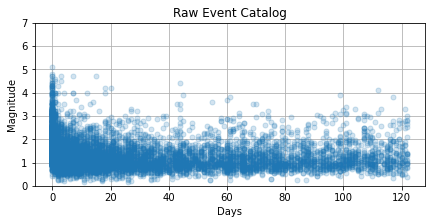

In [5]:
# Plot of magnitude vs. day for entire catalog
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(days,mag,'o',alpha=0.2,markersize=5)
ax.set(xlabel='Days', ylabel='Magnitude',
       title='Raw Event Catalog')
ax.grid()
ax.set_ylim([0,7])
plt.show()

In [ ]:
#Since we have used a 'standard' 7-day probability lets do the same here
#Write code to calculate the 7-day count of aftershocks for M >=2, 3, 4 and 5. 
#Calculate these 7-day counts beginning on day 0, 1, 2, 3, 4, 5, 6 (7 days)

#This sets up the day and magnitude (m) ranges
day1=np.arange(0,7,1)  #set range of days to compute totals. We will compare with the 7-day probabilities
day2=day1 + 7
m=np.arange(2.0,6.0,1.0)

#This creates the result arrays for each magnitude.
m2s=np.zeros(len(day1))
m3s=np.zeros(len(day1))
m4s=np.zeros(len(day1))
m5s=np.zeros(len(day1))

print(f'Observed rates by 7-day period')
for i in range(7):
    m2s[i]=len(LP_catalog[(LP_catalog['Days'] >= ...) & (LP_catalog['Days'] <= ...) & (LP_catalog['Magnitude'] >= ...)])
    m3s[i]=...
    m4s[i]=...
    m5s[i]=...
    print(f'{day1[i]:.0f} to {day2[i]:.0f} days: M2={m2s[i]:.0f} M3={m3s[i]:.0f} M4={m4s[i]:.0f} M5={m5s[i]:.0f}')

obsrate=np.array([m2s[0],m3s[0],m4s[0],m5s[0]]) #this is an array of the first 7-day results that will be useful for plotting later.
    
 

In [6]:
#Now compute the y-day rate from Reasonberg and Jones and compare with the actual


In [7]:
#Make a comparison plot of the observed and predicted 7-day rates.
#It might be helpful to plot log10 of the number of aftershocks for each magnitude since there is a large range in values.


#### Answer here


## Exercise 3 (15 pts)

As discussed in class paleoseismic trench data at Pallet Creek in southern California reveals the quasi-periodic behavior of large earthquakes on the San Andreas fault. From the very careful mapping of offset stratigraphy in the trench and carbon-14 radiometric dating these large earthquakes have been found to have occurred in 1857, 1812, 1480, 1346, 1100, 1048, 997, 797, 734, 671, 529 (see figure from Sieh, K., Stuiver, M. and Brillinger, D., 1989). These earthquakes include M8 earthquakes on the southern segment of the San Andreas fault, which extends from Parkfield southward through the Big Bend into southern California. Each earthquake may not have been as large as M8, however, given the mapped slip, each event is considered to be M>7. The 1857 earthquake was M8. 

<img src="palletCreek.png">

Using this recurrence data we are going to examine the periodicity, plot the distribution of events in terms of binned interval time, compare the observed distribution with idealized probability density functions, and then use those functions to estimate the conditional probability of occurrence of these events.

### Question 3.1

We will analze the recurrence interval data (the time between events). We will then compare the distribution of the recurrance intervals with the idealized Gaussian and Log-Normal distributions to assess which might be more appropriate. With the statistical models we can then utilize probability theory to estimate the probability of occurrence in a given time window for an elapsed time since the previous earthquake.

Gaussian:  
$$
pd(u)=\frac{e^{\frac{-(u - T_{ave})^2}{2 {\sigma}^2}}}{\sigma \sqrt{2 \pi}}
$$


Log-Normal: 
$$
pd(u)=\frac{e^{\frac{-{(ln(u/T_{ave}))}^2}{2 {(\sigma / T_{ave})}^2}}}{(\frac{\sigma}{T_{ave}}) u  \sqrt{2 \pi}}
$$

The models depend on the mean interval recurrence time ($T_{ave}$), the standard deviation to the mean ($\sigma$), and the random variable ($u$) which in this case represents the interval time.


**Question**: Which type of distribution appears to fit the data better? You can answer this question by superimposing the two models over the observed distribution (histogram, bins of 0, 50, 100, 150, etc). You will want to scale the amplitude of the models to agree with the amplitude of the historgram so that you can better assess the shapes of the distributions.

In [ ]:
dates=np.array([1857, 1812, 1480, 1346, 1100, 1048, 997, 797, 734, 671, 529])

#create and array of the observed intervals
intervals=np.zeros(len(dates))
for i in range(len(dates)-1):
    intervals[i]=...
    
#compute the models
Tave=np.mean(intervals)
sig=np.std(intervals)
u=np.arange(0.1,400.,1)
# Gaussian
uG=...
# Log-normal
uLN=...

#Plot the histogram (plt.hist()) and overlay the Gaussian and Log-Normal statistical models
p=plt.hist(intervals,bins=[0,50,100,150,200,250,300,350,400])

#Overlay the uG and uLN models using plt.plot()  You will need to scale uG and uLN so the amplitudes are similar to the histogram.

plt.show()

#### Answer here



## Exercise 4 (15 pts)
In this problem we will estimate the probability of occurrence of a magnitude M8 earthquake based on the historic Pallet Creek recurrence data and the best fitting probability density model determined in Exercise 3.  

The probability that an event will occur within a given time window, for example 30-years, is the definite integral of the probability density function computed over that time window: 
$$
P(T_e <= T <= T_e + \Delta T)=\int_{T_e}^{T_e + \Delta T} pd(u)du,
$$

where $\Delta T$ is the length of the forecast window and $T_e$ is the time since the previous event. Note how P varies as a function of elapsed time. For any given forecast window, the value of P is small but is greatest near the mean of the distribution. Note that the Gaussian and lognormal probability density functions defined above are normalized to unit area. 

### Question 4.1
Estimate the 10-year, 20-year and 30-year probabilities for a repeat of this large Pallet Creek fault segment event using your estimates of $T_{ave}$, $\sigma$, and $T_e=165$ years (time since 1857).

The first step is to find the probability that the event will occur in the window, $\Delta T$, with the condition that the event did not occur before $T_e$. This effectively reduces the sample space. The result is the following normalization for the conditional probability:

$$
P(T_e <= T <= T_e + \Delta T | T >= T_e) = \frac{\int_{T_e}^{T_e + \Delta T} pd(u)du}{1.0 - \int_{0}^{T_e}pd(u)du}
$$

Describe the differences between the two models and the differences between the 10, 20 and 30 year probabilities.

In [ ]:
Te = 2022-1857
#Tave = ...
#sig = ...

# suggestion: make functions to calculate uG and uLN that you can use again in later questions
def calc_uG(Tave,sig,u):
    uG= ...
    return uG
def calc_uLN(Tave,sig,u):
    uLN= ...
    return uLN

#Call the functions to compute uG an uLN
u= np.arange(0.1,600,1)
uG  = calc_uG(Tave,sig,u)
uLN = calc_uLN(Tave,sig,u)

# if we use a step size of 1 (year) then we can numerically integrate by just taking the sum
pG10_Te = ...
pLN10_Te = ...
pG20_Te = ...
pLN20_Te = ...
pG30_Te = ...
pLN30_Te = ...
print("Gaussian model")
print("{:.6f}, {:.6f}, {:.6f}".format(pG10_Te,pG20_Te,pG30_Te))
print("Log-normal model")
print("{:.6f}, {:.6f}, {:.6f}".format(pLN10_Te,pLN20_Te,pLN30_Te))

#### Answer here

### Question 4.2

Estimate the change in the 30-year probability if the event does not occur in the next 10 years.

In [ ]:
#Write code here

### Question 4.3

Can you identify a weakness of this model?

#### Answer here

### Submission

Make sure your notebook has been run computing all cells and showing your final work. Save to a pdf and upload to bcourses.